In [5]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### 1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [8]:
customer = pd.read_csv("./Desktop/Retail/Customer.csv")
transactions = pd.read_csv("./Desktop/Retail/Transactions.csv")
prod_info = pd.read_csv("./Desktop/Retail/prod_cat_info.csv")

Temp1 = pd.merge(left=transactions, right=prod_info, on=["prod_cat_code","prod_sub_cat_code"],how="left")
#Temp1

Customer_Final = pd.merge(left=Temp1, right=customer,right_on="customer_Id", left_on="cust_id", how="left")
Customer_Final


,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0


### 2.Prepare a summary report for the merged data set.


#### a. Get the column names and their corresponding data type

In [11]:
Customer_Final.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_sub_cat_code      int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_subcat           object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
dtype: object

#### b. Top/Bottom 10 observation

In [12]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,27-11-1979,F,3.0


In [66]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,15-01-1982,M,1.0


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)


In [13]:
Customer_Final.describe()

,transaction_id,cust_id,prod_sub_cat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


#### Change the data type of Transaction date (Tran_date column)

In [14]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])
Customer_Final['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

#### Change the data type of DOB in Customer table

In [15]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'])
Customer_Final['DOB']

0       1981-09-26
1       1973-11-05
2       1992-07-27
3       1981-08-06
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

#### d. Frequency tables for all the categorical variables

In [17]:
Customer_Final.loc[0:17,Customer_Final.dtypes=="object"].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,18,18,18,18
unique,4,6,10,2
top,e-Shop,Books,DIY,M
freq,12,6,3,9


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables

#### Histogram for all continuous variables

In [18]:
Continuous_var = Customer_Final.loc[:,['prod_sub_cat_code','prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt']]

In [19]:
Continuous_var.columns

Index(['prod_sub_cat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax',
       'total_amt'],
      dtype='object')

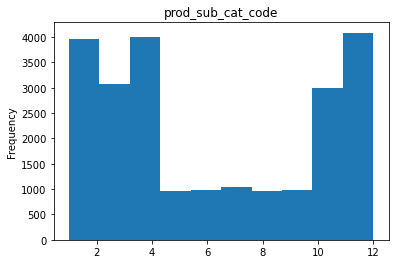

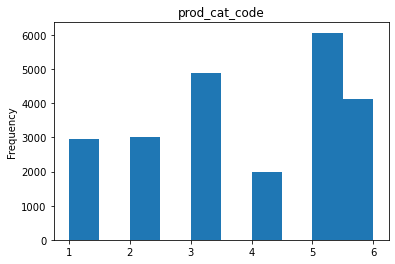

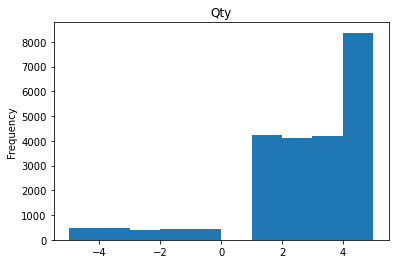

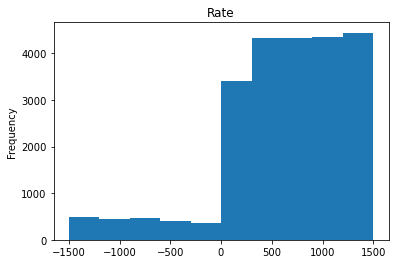

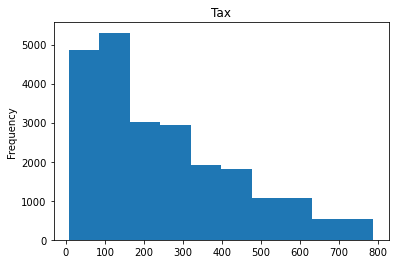

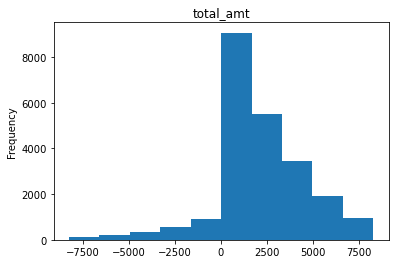

In [20]:
for i in Continuous_var.columns:
    Continuous_var[i].plot(kind='hist')
    plt.title(i)
    plt.show()

In [21]:
Category_var = Customer_Final.loc[:,Customer_Final.dtypes=="object"]

In [22]:
Category_var

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M
...,...,...,...,...
23048,e-Shop,Books,Academic,M
23049,e-Shop,Clothing,Mens,M
23050,MBR,Home and kitchen,Furnishing,M
23051,TeleShop,Books,Children,M


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


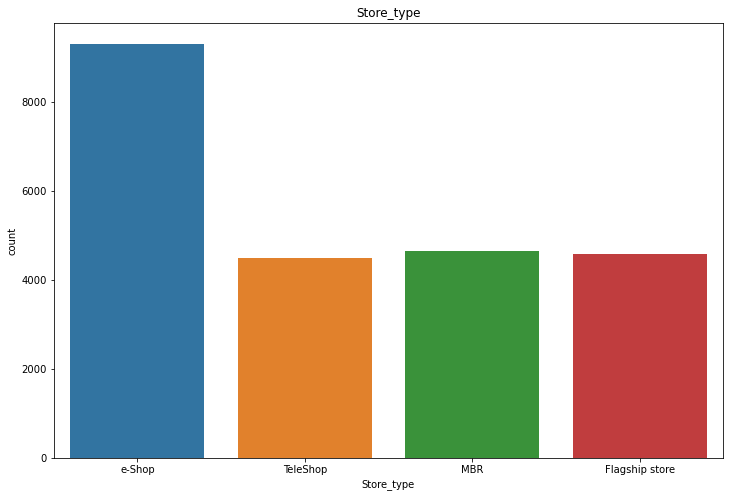

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


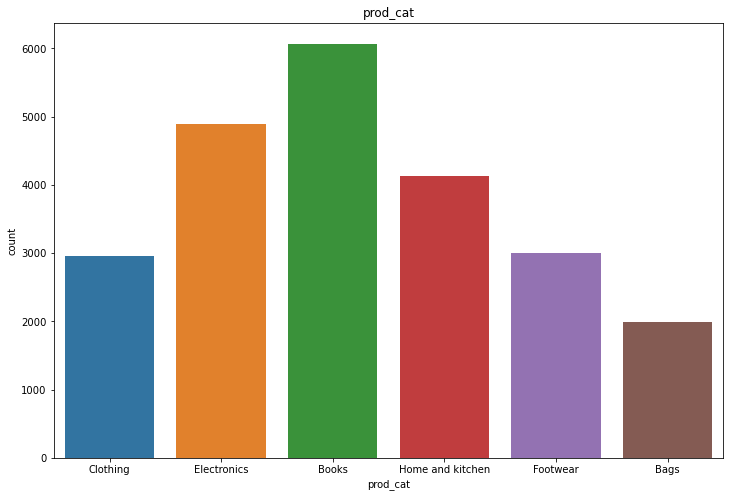

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


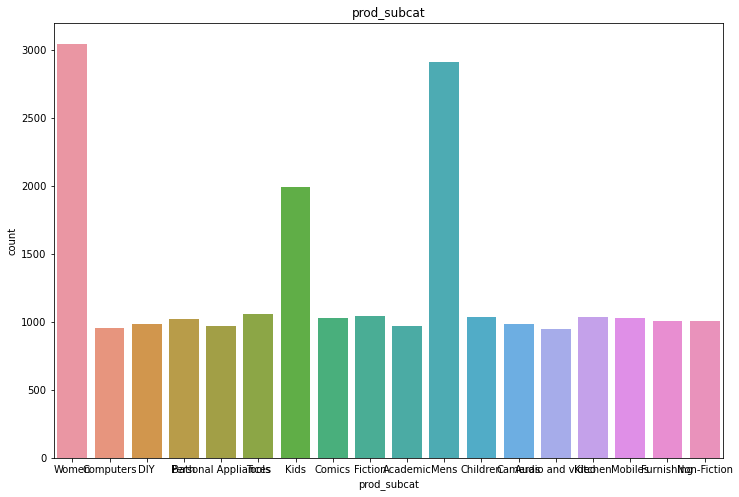

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


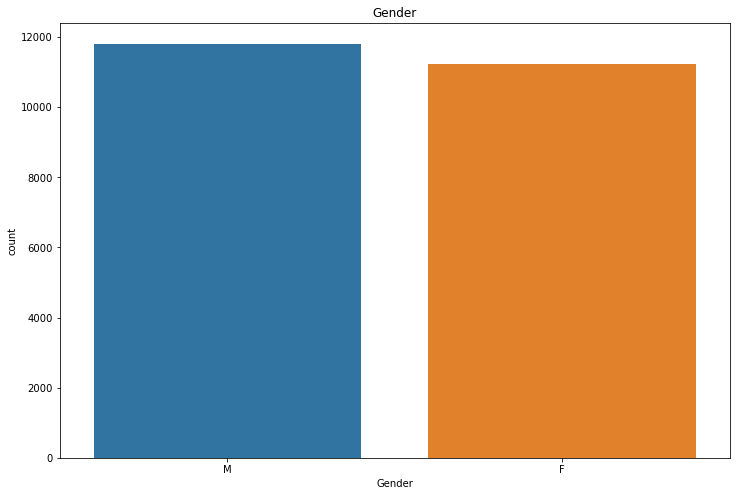

In [23]:
for x in Category_var.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(Category_var[x])
    plt.title(x)
    plt.show()

### 4. Calculate the following information using the merged dataset :
 #### a. Time period of the available transaction data

In [24]:
min_date = Customer_Final['tran_date'].min()

max_date = Customer_Final['tran_date'].max()

print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


#### b. Count of transactions where the total amount of transaction was negative


In [25]:
Exclude_negative = Customer_Final.loc[Customer_Final["total_amt"] < 0,"transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is : ",Exclude_negative)

Count of transactions where the total amount of transaction was negative is :  2177


### 5. Analyze which product categories are more popular among females vs male customer

In [26]:
popular_prod_cat = Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()
popular_prod_cat

popular_prod_cat.pivot(index = "Gender", columns = "prod_cat", values = "Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [27]:
cust_grp = Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending = False)
print("Maximum customers city code = ",cust_grp.head(1))

percentage = round(cust_grp[4.0] / cust_grp.sum() * 100,2)
print("% of customers from the city : ",percentage)

Maximum customers city code =  city_code
4.0    2422
Name: customer_Id, dtype: int64
% of customers from the city :  10.51


### 7. Which store type sells the maximum products by value and by quantity

In [32]:
Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values("Qty",ascending=False).head(1)

<ipython-input-32-6e99896e922e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby("Store_type")["Qty","Rate"].sum().sort_values("Qty",ascending=False).head(1)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [35]:
store_cat_grp = round(Customer_Final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)
print("total amount earned from the Electronics and Clothing categories from Flagship Stores : ",store_cat_grp.loc[["Clothing","Electronics"],"Flagship store"].sum())

total amount earned from the Electronics and Clothing categories from Flagship Stores :  3409559.27



### 9. What was the total amount earned from "Male" customers under the "Electronics" category

In [36]:
gen_grp = round(Customer_Final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)
earning_male = gen_grp.loc['Electronics','M']
print("Total amount earned from male customers under Electronics city : ",earning_male)

Total amount earned from male customers under Electronics city :  5703109.43


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [37]:
#Find transactions with positive values
positiveTrans = Customer_Final.loc[Customer_Final["total_amt"]>0,:]

#filter out unique transactions from positive transactions
uniqueTrans = positiveTrans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

#Count unique transactions for each customer
unique_trans_count = uniqueTrans.groupby('customer_Id')['transaction_id'].count().reset_index()

print("Customers having more than 10 Unique transactions = ",unique_trans_count[unique_trans_count['transaction_id'] >=10])


Customers having more than 10 Unique transactions =        customer_Id  transaction_id
2675       270908              10
3561       272286              10
4032       273014              10
5227       274854              10


### 11. For all customers aged between 25 - 35, find out:
 #### a. What was the total amount spent for “Electronics” and “Books” product categories

In [38]:
# introducing new column "AGE"
now = pd.Timestamp('now')
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format='%m%d%y')    # 1
Customer_Final['DOB'] = Customer_Final['DOB'].where(Customer_Final['DOB'] < now, Customer_Final['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Customer_Final['AGE'] = (now - Customer_Final['DOB']).astype('<m8[Y]')

In [39]:
# to deal with customers between age group 25 - 35 we must create age category
Customer_Final['Age_cat'] = pd.cut(Customer_Final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)


In [40]:
spent = Customer_Final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()
print("The total amount spent for Electronics and Books =",spent.loc['25-35',['Books','Electronics']].sum().round(2))

The total amount spent for Electronics and Books = 7682962.24


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [41]:
#customer_between 25-35
customer_between = Customer_Final[Customer_Final['Age_cat']=='25-35']

# getting all the data with transaction date between 1st Jan 2014 to 1st Mar 2014?
total_amount = customer_between[(customer_between['tran_date'] >='2014-01-01')
                                           & (customer_between['tran_date'] <='2014-03-01')]
print("Total amount spent by customers from 1 JAN 2014 to 1 MAR 2014 is = ",total_amount['total_amt'].sum())

Total amount spent by customers from 1 JAN 2014 to 1 MAR 2014 is =  531443.12
